# Using Other Packages with Python

## Summary
In this notebook, we'll be covering:
- [Importing packages](#Importing-Packages)
- [Using functions from packages](#Using-Functions-from-Packages)

### Introduction
The power of Python comes in part from its extensive selection of libraries (often called packages). `pandas` is one of these, but for many applications you will want to use additional packages such as `numpy` or `scikit-learn` for statistical testing or machine learning. This section will not cover all possibilities (which would make this section longer than the rest of the course), but will start assuming that you have looked up your target analysis and the word "Python" and found a package to use. At this point you will know something like "I want to use the function called 'LinearRegression' in the package scikit-learn". This module will walk you through how to figure out how to use a function, and specifically, how to use it with `pandas`.

A brief note: additional, importable code in Python may be a module, a package, or a library. These are technically different, but this difference doesn't matter to you. I will refer to these as packages in this notebook because that's a fairly standard way to refer to all of the importable code you can download off the internet from the official Python package repository.

### Importing Packages
We have already imported a number of packages in our other notebooks. `random`, `numpy`, and `pandas` itself are all examples. To use a function in a package you need to import it, first. Importing the package effectively adds it to your code, and so Python doesn't import every available package by default, because that would make it slow and bulky. Instead, you tell Python which additional utilities you want. Let's start with `random`.

In [12]:
import random

Now we have all the functions of `random` available to us by writing `random`, a period, and the name of the function. `randint` takes a start and a stop and returns a random integer, N, such that start <= N <= stop. Let's use it.

In [35]:
random.randint(1, 10)

5

There are two other import patterns you will want to recognize: `from x import y` and `import x as z`. `from x import y` from allows us to dispense with writing the package name first. Below, we'll import `randint`.

In [14]:
from random import randint

We can now just use `randint` as is.

In [36]:
randint(1, 10)

6

However, ONLY `randint` is accessible this way. `from random import randint` did not import the whole random package, just `randint`, and so functions like `gauss` are inaccessible. (Technically, since we ran `import random` earlier, we could use `gauss` by calling `random.gauss`, but the most recent import isn't responsible for that.)

You could pull in everything from `random` using `from random import *`. Don't do this.

Here's why: when you run `from random import *` you get everything in random, not just the functions you want. Now imagine you also did this for numpy (`from numpy import *`). Unfortunately, numpy and random both have a function called random. So when you write `random()` do you get the behavior from `random.random()` or `numpy.random()`? The answer is that it depends what order the import statements were written in. So don't import everything. If you use the `from x import y` pattern to only import the specific things you want, you can make sure you don't import two things with the same name.

For completeness, here's how to import multiple things this way:

In [16]:
from random import randint, gauss, random

You can now use any of these functions without dot notation.

#### Below, write code to use gauss to generate a random number from a gaussian distribution. The function takes two arguments, a mean and a standard deviation, in that order.

In [17]:
# your code goes here


The nice thing about `from x import y` is that it saves some typing. The `import x as z` can also do this. We frequently run `import pandas as pd` in our notebooks, which imports `pandas` but renames it to `pd`. It's very common to see two-letter aliases for packages. `datetime` ends up as `dt` a lot, `numpy` is almost always `np`. While there's a possibility to mess things up and choose the same two letters twice you are the one writing this, and so you can catch that error. (I recommend writing all your import statements in one code block so you can easily see these issues, and easily run them all together when you re-open a notebook.)

The `zeros` function in numpy makes an array of zeros if you give it an array size argument. 

#### Below, write the import statement necessary to make `np.zeros((2, 1))` run, and then try it.

In [18]:
# your code goes here


`datetime` is another useful package. Inside `datetime` we have a `datetime` class (e.g., `datetime.datetime`) with a `now` function. Calling `now` with no arguments (`now()`) prints the date and time right now. 

#### Below, write the code required to import the datetime library and then call the `now` function from within datetime's datetime class.

In [19]:
# your code goes here


### Using Functions from Packages
It's not very useful to know how to import packages if you don't know how to use the functions within. Python packages usually have a website where there will be a description of the package contents. This will sometimes be labeled as the API.

Normally, a function (or function-like object) is described by describing what arguments it takes in order, then the arguments in detail, and then an example or two is given. Let's look at performing a linear regression using scikit-learn.

As of the time of writing, the page describing this function is here: https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html

At the bottom is an example. A few lines should stick out. The first is below.

In [20]:
from sklearn.linear_model import LinearRegression

That is the import statement that gets the `LinearRegression` class into our notebook.

The next lines show creating an x and a y that are, hopefully, just pandas Series for us. The next line reads:
```Python
reg = LinearRegression().fit(X, y)
```

We haven't talked much about classes (although we have used lots of them) but `LinearRegression` is a class. The line above is equivalent to running `reg = LinearRegression()` (which would create the regression object) and then `reg.fit(X, y)` which would fit the data.

You can see later that `reg` (an instance of `LinearRegression`) has lots of methods, including `coef_`, `score`, `intercept_`, and `predict`. So we probably want to make a regression object, fit it to some data from our dataframe, and then use these methods to look at the equation.

Let's try this. First, we'll need our data back.

In [21]:
import pandas as pd
import random

workout_dict = {'ID': [], 'Measurement Device': [], 'Heart Rate Max': [], 'Heart Rate Min': [], 'Heart Rate Avg': [],
              'Duration of exercise (min)': [], 'Exercise Type': []}
used_ids = []

for x in range(0, 500):
    workout_id = random.randint(100000000, 999999999)
    while workout_id in used_ids:
        workout_id = random.randint(100000000, 999999999)
    used_ids.append(workout_id)
    device = random.choice(['Skykandal', 'B-Wolf'])
    mu = random.randint(65, 85)
    min_rate = int(random.gauss(mu, 10))
    max_rate = int(random.gauss(mu + 55, 25))
    while max_rate <= min_rate:
        max_rate = int(random.gauss(mu + 55, 25))
    avg = random.gauss((max_rate + min_rate) / 2, (max_rate - min_rate) / 5)
    duration = random.randint(10, 90)
    exercise = random.choice(['Running', 'Running', 'Running', 'Bicycling', 'Swimming', 'Swimming',
                              'Weight training'])
    row = [device, min_rate, max_rate, avg, duration, exercise]
    workout_dict['ID'].append(workout_id)
    workout_dict['Measurement Device'].append(row[0])
    workout_dict['Heart Rate Min'].append(row[1])
    workout_dict['Heart Rate Max'].append(row[2])
    workout_dict['Heart Rate Avg'].append(row[3])
    workout_dict['Duration of exercise (min)'].append(row[4])
    workout_dict['Exercise Type'].append(row[5])

df = pd.DataFrame(workout_dict)
df.head(10)

,ID,Measurement Device,Heart Rate Max,Heart Rate Min,Heart Rate Avg,Duration of exercise (min),Exercise Type
0,509363964,Skykandal,149,57,124.093536,51,Running
1,214016781,B-Wolf,154,57,114.798606,15,Running
2,281176914,B-Wolf,153,83,122.703714,26,Running
3,701428087,Skykandal,114,79,87.053149,10,Bicycling
4,908614559,Skykandal,144,69,98.281793,24,Bicycling
5,872714938,Skykandal,133,100,117.189322,78,Running
6,740145605,Skykandal,103,58,95.102732,83,Running
7,309606768,Skykandal,134,64,109.425703,24,Weight training
8,389357222,B-Wolf,123,83,113.723398,59,Swimming
9,488817326,B-Wolf,116,69,94.296064,79,Running


Let's try to make a regression linking Heart Rate Max and Heart Rate Avg. Those should be related.

What we're going to do is copy all the lines up through the line that fits the regression, but change the `X` and `y` variable to be columns from out dataframe. (We also dropped their comment line out, but added one of our own.)

In [22]:
import numpy as np
from sklearn.linear_model import LinearRegression
# The next two lines are where we replace the text they had so that X and y become our columns
X = df['Heart Rate Max']
y = df['Heart Rate Avg']
reg = LinearRegression().fit(X, y)

ValueError: Expected a 2-dimensional container but got <class 'pandas.core.series.Series'> instead. Pass a DataFrame containing a single row (i.e. single sample) or a single column (i.e. single feature) instead.

If you run that, it doesn't work. Part of the error output says "Reshape your data either using array.reshape(-1, 1)..." so let's try that.

In [23]:
# these lines are where we think the problem began
X = df['Heart Rate Max'].reshape(-1, 1)
y = df['Heart Rate Avg'].reshape(-1, 1)
reg = LinearRegression().fit(X, y)

AttributeError: 'Series' object has no attribute 'reshape'

This fails with `'Series' object has no attribute 'reshape'`. (There are a lot of errors. This is not unusual when you are figuring things out from scratch.)

However, this seems straighforward: `reshape` is an array method, and these are `Series`. A quick internet search for turning things into `numpy` arrays reveals that there's a `numpy` function called `asarray` that does exactly this. Since we have already imported `numpy as np` we can try this as well.

In [24]:
X = np.asarray(df['Heart Rate Max']).reshape(-1, 1)
y = np.asarray(df['Heart Rate Avg']).reshape(-1, 1)
reg = LinearRegression().fit(X, y)

This works, although what it does is unclear since nothing prints.

However, it doesn't take much imagination (or scrolling around on the documentation page) to see that `coef_` gives us the fitted coefficients and `intercept_` gives us the y-intercept.

In [25]:
reg.coef_

array([[0.5746457]])

In [26]:
reg.intercept_

array([28.4328488])

We can also get an R<sup>2</sup> value using `score`, which is a method requiring the X and y variables again.

In [27]:
reg.score(X, y)

0.4955593974077238

#### Below, run a regression linking Heart Rate Min to Heart Rate Max.

In [28]:
# your code goes here


Let's try to graph our regression line from `scikit-learn`. We can do this in `matplotlib`. One advantage of `matplotlib` is that we can overlay multiple elements, so we can graph the regression line and the scatterplot data on the same graph. Let's try to use `matplotlib.pyplot.scatter`, which [appears](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.scatter.html) to take only two required arguments (x and y data) to make a scatterplot. We'll be importing `matplotlib.pyplot as plt`, because we'll need more than just scatter from that package.

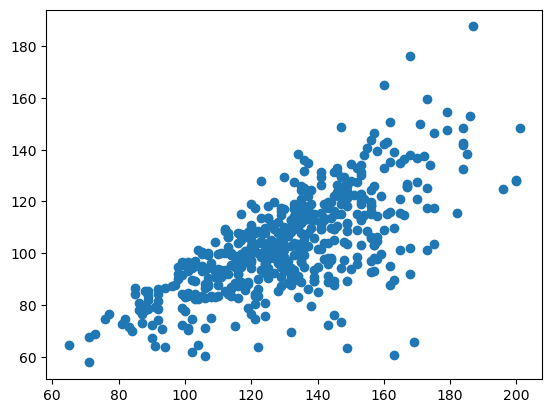

In [29]:
import matplotlib.pyplot as plt

plt.scatter(df['Heart Rate Max'], df['Heart Rate Avg'])

Great! That was pretty easy. Can we graph the regression line?

If you click around enough on the side menu, or use a search engine (recommended) you'll find that `matplotlib.pyplot.plot` makes lines. Let's try to graph the predicted line from our regression model (named `reg`).

`matplotlib.pyplot.plot` takes two required arguments, an X and a Y variable.

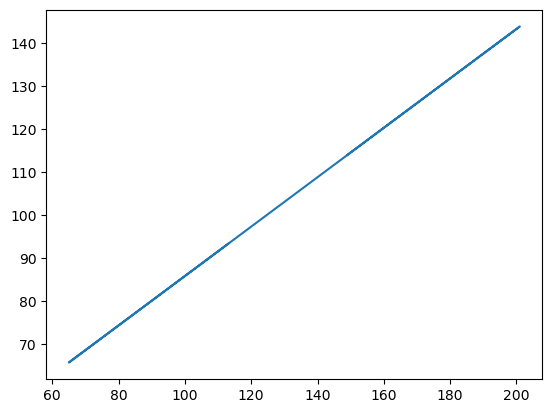

In [30]:
plt.plot(X, reg.predict(X))

This works, but how do we get them on the same plot?

Partway through the page about `plot` there's a question about plotting multiple data sets. The answer begins, "The most straightforward way is just to call plot multiple times".

Since the worst that will happen is that it doesn't work let's try that. We'll just write both our graph-generating lines in the same code cell.

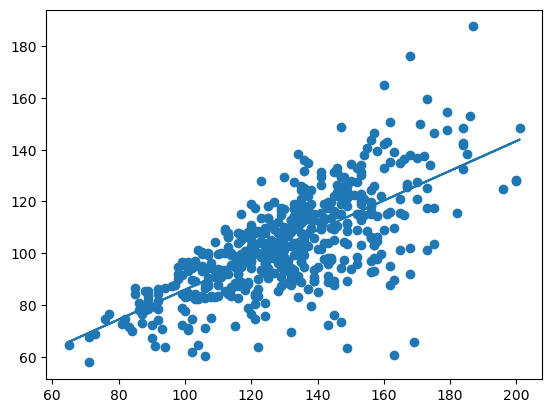

In [31]:
plt.scatter(df['Heart Rate Max'], df['Heart Rate Avg'])
plt.plot(X, reg.predict(X))

And it works! With minimal effort!

#### Unfortunately, the color of the line is hard to see. Change it.

In [32]:
# your code goes here


#### Additionally, the graph starts somewhere near (60, 60), not (0, 0). Fix that, too.

In [33]:
# your code goes here


Our original regression didn't give us a p-value. It's not present for the scikit-learn. That is a function one can get from scipy.stats.linregress.

#### Below, replicate our regression using scipy.stats.linregress and get a p-value.

In [34]:
# your code goes here


And that's it!